In [1]:
import sys

sys.path.append("../..")
sys.path.append("../../../py-modelrunner")

import time
from collections import Counter
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import pandas as pd

from tqdm.auto import tqdm

import warnings

warnings.filterwarnings("error", category=np.VisibleDeprecationWarning)

In [2]:
import multicomp as mm

In [17]:
i1 = mm.FullChiIndividual()
i2 = i1.copy()

In [3]:
OptModel = mm.get_optimization_model(mm.FullChiIndividual, mm.PartitioningEnvironment)

parameters = {
    # parameters of the individual
    "num_comp_init": 4,
    "repetitions": 4,
    "chi_limit": "norm",
    "chi_norm_max": 5,
    # parameters of the population
    "num_processes": 4,
    # parameters of the environment
    "target_phase_count": 3,
    "enriched_components": [0],
    # parameters of the optimization
    "num_individuals": 4,
    "num_generations": 3,
}

In [4]:
opt = OptModel(parameters)

In [5]:
result = opt()

  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
fitness_mean = result["trajectory"]["fitness_mean"]
fitness_std = result["trajectory"]["fitness_std"]

<ErrorbarContainer object of 3 artists>

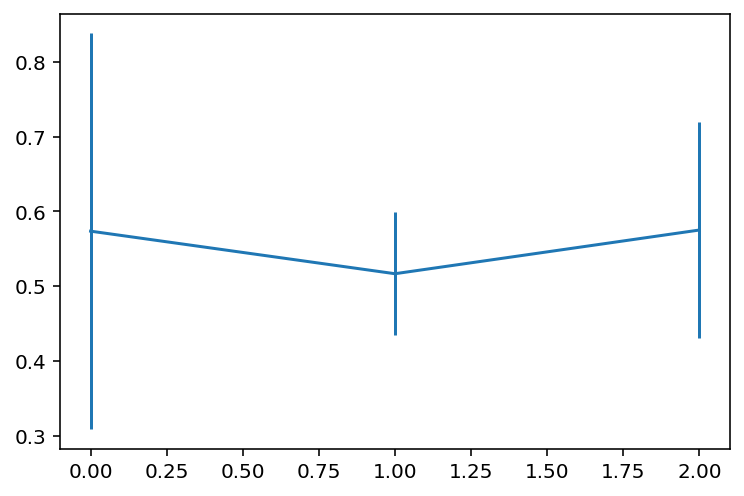

In [7]:
plt.errorbar(np.arange(len(fitness_mean)), fitness_mean, fitness_std)

In [8]:
ind = opt.population[0]

In [9]:
ind.show_parameters()

repetitions: int = 4
num_phases: int = 6
composition_distribution: str = 'simplex_uniform'
composition_sigma: float = 1.0
simulation_t_range: float = 10000.0
simulation_dt: float = 0.1
equilibrium_tolerance: float = 1e-05
cluster_threshold: float = 0.01
relaxation_method: str = 'explicit'
cache_dynamics: bool = True
num_comp_init: int = 4
chi_mean: float = 4.2
chi_std: float = 1.0
chi_limit: str = 'norm'
chi_min: float = -inf
chi_max: float = inf
chi_norm_max: float = 5.0
randomize_chi_mean: bool = True
mutation_strategy: str = 'all_entries'
mutation_size: float = 0.5
gene_dup_rate: float = 0.0
gene_loss_rate: float = 0.0
num_comp_max: int = 32


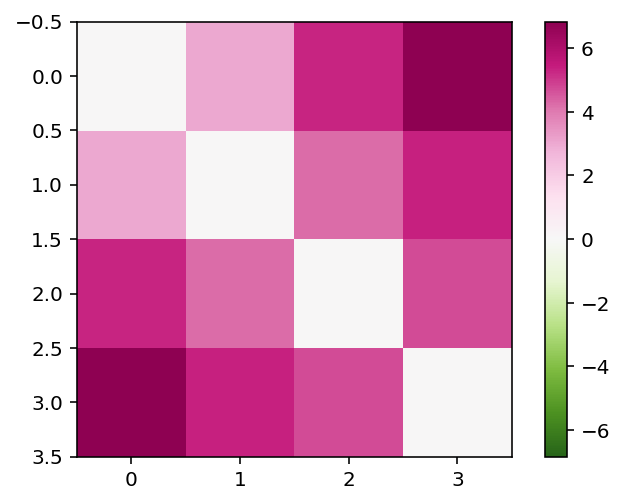

In [10]:
plt.imshow(ind.free_energy.chis, norm=colors.CenteredNorm(), cmap="PiYG_r")
plt.colorbar()

In [11]:
fit_phasecount = opt.environment.get_fitness(opt.population, weight=1)
fit_composition = opt.environment.get_fitness(opt.population, weight=0)
fit_phasecount, fit_composition

(array([0.70489799, 1.        , 0.58709915, 1.        ]),
 array([0.48799946, 0.26127073, 0.21349431, 0.4362352 ]))

In [12]:
stats = opt.population.get_stats(["phase_counts", "phis"])

In [13]:
phis = stats[0]["phis"]
len(phis)

4

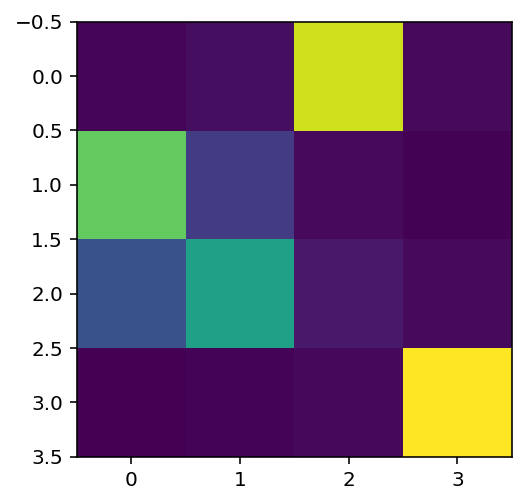

In [14]:
plt.imshow(phis[3])